In [8]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import joblib
import matplotlib.pyplot as plt



# Alleen train inladen
train_path = "../../data/data_train.csv" 
df = pd.read_csv(train_path, sep=",", decimal=".")
df['Seconds_Per_Call'] = df['Seconds of Use'] / df['Frequency of use'].replace(0,1)
df['SMS_per_Call'] = df['Frequency of SMS'] / df['Frequency of use'].replace(0,1)
df['Total_Activity'] = df['Frequency of use'] + df['Frequency of SMS']
df['Unique_Number_Ratio'] = df['Distinct Called Numbers'] / df['Frequency of use'].replace(0,1)
df['Usage_per_month'] = df['Seconds of Use'] / df['Subscription Length']
df['Complaints_per_Activity'] = df['Complaints'] / df['Total_Activity'].replace(0,1)


In [10]:
# Scheiden van target en input variabelen
target = "Churn"

X = df.drop(columns=[target])
y = df[target]

X.shape, y.shape


((1995, 15), (1995,))

In [11]:
# Er is maar een categorische variabelen waar we OneHotEncoder op kunnen gebruiken namelijk Age group, 
# ookal is dit eigenlijk niet nodig omdat we ook een numerieke Age variabelen in de dataset hebben, maar de opdracht zei dat het moest...
cat_cols = ["Age Group"]
num_cols = [c for c in X.columns if c not in cat_cols]

In [24]:
# ColumnTransformer voor OneHotEncoder en StandardScaler voor de overige numerieke variabelen
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [28]:
# Hier maken we de pipline aan 
prep_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])
prep_pipeline

,steps,"[('preprocessing', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Hier stoppen we X (input variabelen) in onze pipeline en leert de pipeline hoe hij deze moet schalen/encoden
X_prepared = prep_pipeline.fit_transform(X)
X_prepared.shape

array([[-0.91404633, -0.29125369,  0.76399641, ...,  1.        ,
         0.        ,  0.        ],
       [-0.36267512, -0.29125369, -1.42872594, ...,  0.        ,
         0.        ,  0.        ],
       [-1.05188914, -0.29125369,  0.64858997, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.8779101 , -0.29125369, -0.39006798, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18869609, -0.29125369, -0.50547442, ...,  0.        ,
         0.        ,  1.        ],
       [-0.22483232, -0.29125369, -3.04441609, ...,  1.        ,
         0.        ,  0.        ]])

We hebben nu 13 kolommen omdat door OneHotEncoder de categorische Age is omgezet naar 5 binaire kolommen.

In [26]:
# Fase 4: Nu voegen we Logistic Regression toe aan onze pipeline
model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(random_state=2026))
])

model_pipeline

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [40]:
# Fit het model
model_pipeline.fit(X, y)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# De pipeline opslaan als bestand
joblib.dump(model_pipeline, "../../data/model_pipeline.joblib")
# Model weer inladen:
# model_pipeline = joblib.load("../../data/model_pipeline.joblib")

['../../data/model_pipeline.joblib']

Nu hebben we het modelleren afgerond.
De volgende stap is ons model beoordelen op de trainingsdata

Accuracy: 0.904
Confusion matrix:
[[1646   14]
 [ 177  158]]
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1660
           1       0.92      0.47      0.62       335

    accuracy                           0.90      1995
   macro avg       0.91      0.73      0.78      1995
weighted avg       0.91      0.90      0.89      1995

ROC-AUC: 0.930


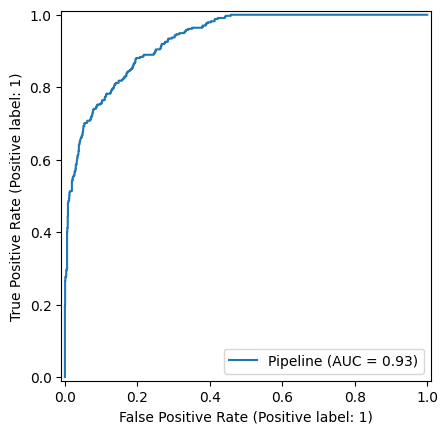

In [41]:
# Voorspel de kans op Churn
#proba = model_pipeline.predict_proba(X)[:, 1]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

y_pred = model_pipeline.predict(X)
y_prob = model_pipeline.predict_proba(X)[:,1]  # kans dat Churn = 1


# 2️⃣ Accuracy
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.3f}")

# 3️⃣ Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(cm)

# 4️⃣ Classification report
print("Classification report:")
print(classification_report(y, y_pred))

# 5️⃣ ROC-AUC
roc_auc = roc_auc_score(y, y_prob)
print(f"ROC-AUC: {roc_auc:.3f}")

# 6️⃣ ROC-curve plotten
RocCurveDisplay.from_estimator(model_pipeline, X, y)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X)
y_proba = rf.predict_proba(X)[:,1]

print(classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_proba))
cm = confusion_matrix(y, y_pred)
print("Confusion matrix:")
print(cm)


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1660
           1       0.89      0.66      0.76       335

    accuracy                           0.93      1995
   macro avg       0.91      0.82      0.86      1995
weighted avg       0.93      0.93      0.92      1995

ROC-AUC: 0.9670733680992627
Confusion matrix:
[[1634   26]
 [ 115  220]]


In [34]:
import pandas as pd
import plotly.express as px

feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

fig = px.bar(
    feat_imp,
    x='Feature',
    y='Importance',
    title='Feature Importance Random Forest',
    width=1200,
    height=400
)
fig.update_layout(template='simple_white')
fig.show()
